Q1 - import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path='/Users/z/Documents/CF/Unit 1/4. Python Fundamentals for Data Analysts /06-2023-Instacart Basket Analysis'

In [3]:
# import dataset
ords_prods_merge =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','Eercise_4.9_part1_ords-prods-cust.pkl'))

Q2 - data security

In [4]:
# display all columns
pd.options.display.max_columns = None


In [5]:
# check data types
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag,First Name,Surnam,Gender,STATE,Age,date_joined,children,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,fewest orders,10,New customer,6.367797,low spender,NaN,NaN,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,20.259259,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.967033,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,11.487179,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.357143,high spender,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


The only problematic information is a combination of a few data points. 
More specifically, the full name, combined with age and state. 
That might narrow down to a group of individuals or to a single individual if the name is unique enough. 
I would therefore remove the name columns

In [6]:
#dropping first and last name columns due to PII
ords_prods_merge = ords_prods_merge.drop(columns = ['First Name'])
ords_prods_merge = ords_prods_merge.drop(columns = ['Surnam'])

In [7]:
#checking dropped columns
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0              int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range             object  
 17  price_range_loc         object  
 18  busiest_day             object  
 19  slow_and_busy_days      object  
 20  busiest_period_of_day   object  
 21  max_or

Q3 - Asign region flag


In [8]:
# create group of regions

In [9]:
region1_northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [10]:
region2_midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [11]:
region3_south = ['Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [12]:
region4_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [13]:
# asign regions to rows

In [14]:
ords_prods_merge.loc[ords_prods_merge['STATE'].isin(region1_northeast), 'region'] = 'region1'

In [15]:
ords_prods_merge.loc[ords_prods_merge['STATE'].isin(region2_midwest), 'region'] = 'region2'

In [16]:
ords_prods_merge.loc[ords_prods_merge['STATE'].isin(region3_south), 'region'] = 'region3'

In [17]:
ords_prods_merge.loc[ords_prods_merge['STATE'].isin(region4_west), 'region'] = 'region4'

In [18]:
# checking output
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag,Gender,STATE,Age,date_joined,children,fam_status,income,region
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,fewest orders,10,New customer,6.367797,low spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,region3
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,20.259259,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3
2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.967033,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,11.487179,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3
4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.357143,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3


In [19]:
crosstab = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spend_flag'], dropna = False)

In [20]:
crosstab

spend_flag,high spender,low spender
region,,
region1,108298,5620004
region2,156086,7447681
region3,193404,9970588
region4,160724,8139638


In [21]:
#there is definitely a difference between regions when region 3 is best performing and region1 is the worst performing

Q4 - exclusion flag for low activity customers

In [22]:
# check names of columns 
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour_of_day       int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  _merge                  category
 11  Unnamed: 0              int64   
 12  product_name            object  
 13  aisle_id                int64   
 14  department_id           int64   
 15  prices                  float64 
 16  price_range             object  
 17  price_range_loc         object  
 18  busiest_day             object  
 19  slow_and_busy_days      object  
 20  busiest_period_of_day   object  
 21  max_or

In [23]:
# create exclusion flag
ords_prods_merge['exclusion_flag'] = ords_prods_merge['max_order'].apply(lambda x: 'Yes' if x < 5 else 'No')

In [24]:
# check output
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag,Gender,STATE,Age,date_joined,children,fam_status,income,region,exclusion_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,fewest orders,10,New customer,6.367797,low spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,region3,No
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,20.259259,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No
2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.967033,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,11.487179,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No
4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.357143,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No


Q5 - customer profiling

In [25]:
# check age charachtaristics
ords_prods_merge['Age'].describe()

count    3.243421e+07
mean     4.946521e+01
std      1.848553e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [26]:
# create age categories
ords_prods_merge.loc[ords_prods_merge['Age']<30,'age_category']='young'
ords_prods_merge.loc[(ords_prods_merge['Age']>=30) & (ords_prods_merge['Age']<60)  ,'age_category']='adults'
ords_prods_merge.loc[ords_prods_merge['Age']>=60,'age_category']='old'


In [27]:
#check output
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,slow_and_busy_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,purchase_frequency,frequency_flag,Gender,STATE,Age,date_joined,children,fam_status,income,region,exclusion_flag,age_category
0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,fewest orders,10,New customer,6.367797,low spender,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,region3,No,adults
1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,20.259259,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No,adults
2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Regularly busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.967033,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No,adults
3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,11.487179,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No,adults
4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Mid-range product,Least busy,slowest days,fewest orders,10,New customer,6.367797,low spender,15.357143,high spender,Female,Alabama,31,2/17/2019,3,married,40423,region3,No,adults


In [28]:
ords_prods_merge['age_category'].value_counts()

adults    15260958
old       11077150
young      6096104
Name: age_category, dtype: int64

In [29]:
# check income charactaristics
ords_prods_merge['income'].describe()

count    3.243421e+07
mean     9.943525e+04
std      4.305473e+04
min      2.590300e+04
25%      6.699800e+04
50%      9.661200e+04
75%      1.279080e+05
max      5.939010e+05
Name: income, dtype: float64

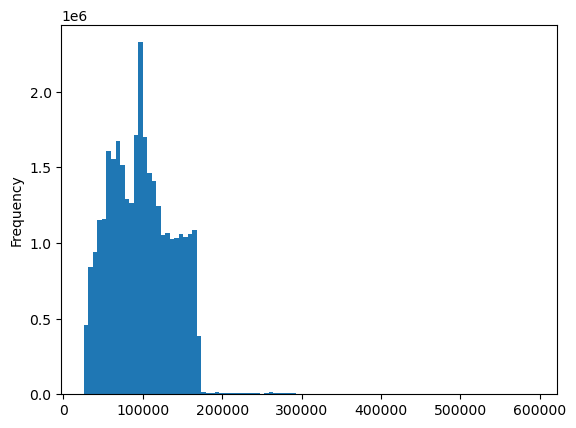

In [30]:
# visualise income
income_hist=ords_prods_merge['income'].plot.hist(bins=100)

In [31]:
# create income segmentation
# create age categories
ords_prods_merge.loc[ords_prods_merge['income']<50000,'income_category']='50k low'
ords_prods_merge.loc[(ords_prods_merge['income']>=50000) & (ords_prods_merge['income']<100000)  ,'income_category']='50-100k medium'
ords_prods_merge.loc[(ords_prods_merge['income']>=100000) & (ords_prods_merge['income']<150000)  ,'income_category']='100-150k high'

ords_prods_merge.loc[ords_prods_merge['income']>=150000,'income_category']='150k+ very high'


In [32]:
# check vlaues
ords_prods_merge['income_category'].value_counts()

50-100k medium     14009004
100-150k high      10772256
150k+ very high     4055081
50k low             3597871
Name: income_category, dtype: int64

In [33]:
# check dependents charactaristics
ords_prods_merge['children'].describe()

count    3.243421e+07
mean     1.501872e+00
std      1.118871e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: children, dtype: float64

In [34]:
ords_prods_merge['children'].value_counts()

3    8142318
0    8105197
2    8098387
1    8088310
Name: children, dtype: int64

In [35]:
# create children segmentation
ords_prods_merge.loc[ords_prods_merge['children']<1, 'with children']='no'
ords_prods_merge.loc[ords_prods_merge['children']>=1, 'with children']='yes'

In [36]:
# check output
ords_prods_merge['with children'].value_counts()

yes    24329015
no      8105197
Name: with children, dtype: int64

Q6 - create visualisations

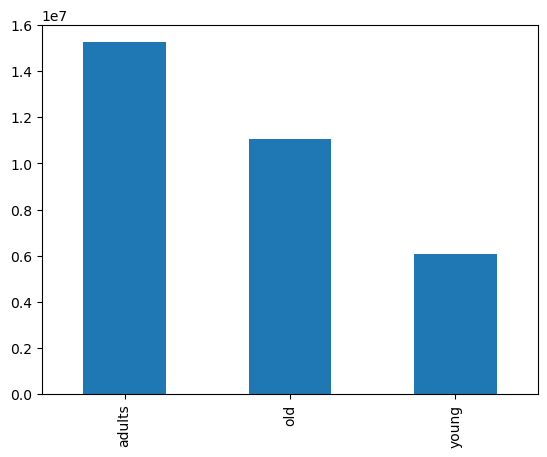

In [37]:
# visualise age groups
age_bar=ords_prods_merge['age_category'].value_counts().sort_index().plot.bar()

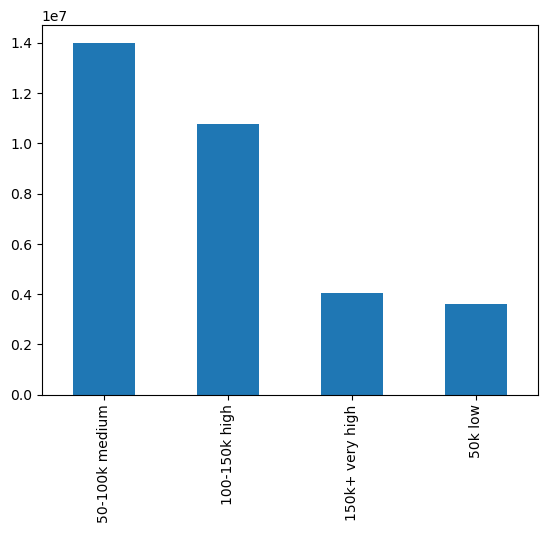

In [38]:
income_bar=ords_prods_merge['income_category'].value_counts().plot.bar()

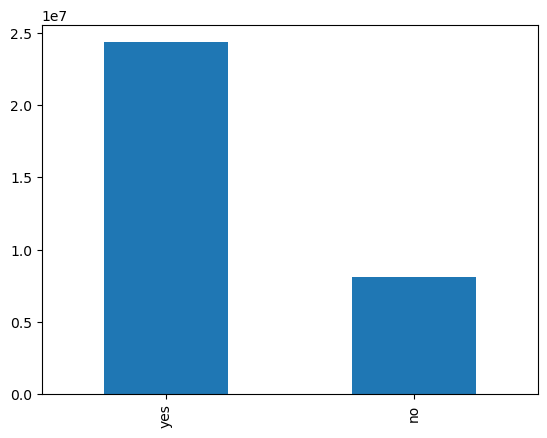

In [39]:
children_bar=ords_prods_merge['with children'].value_counts().plot.bar()

Q7 - aggregate values

In [40]:
# aggregate by age groups
age_analysis=ords_prods_merge.groupby('age_category').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [41]:
# check output
age_analysis

prices               days_since_prior_order           
                   mean  min      max                   mean  min   max
age_category                                                           
adults        12.061876  1.0  99999.0              11.108828  0.0  30.0
old           11.764519  1.0  99999.0              11.092861  0.0  30.0
young         12.172666  1.0  99999.0              11.113005  0.0  30.0

In [42]:
# aggregate by income groups
income_analysis=ords_prods_merge.groupby('income_category').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [43]:
# check output
income_analysis

prices               days_since_prior_order           
                      mean  min      max                   mean  min   max
income_category                                                           
100-150k high    10.442022  1.0  99999.0              11.077417  0.0  30.0
150k+ very high  32.872820  1.0  99999.0              10.941324  0.0  30.0
50-100k medium    8.472926  1.0  99999.0              11.049228  0.0  30.0
50k low           6.702746  1.0     25.0              11.587031  0.0  30.0

In [44]:
# aggregate by children groups
children_analysis=ords_prods_merge.groupby('with children').agg({'prices': ['mean', 'min', 'max'], 
                                                              'days_since_prior_order': ['mean', 'min', 'max']})

In [45]:
# check output
children_analysis

prices               days_since_prior_order           
                    mean  min      max                   mean  min   max
with children                                                           
no             12.130045  1.0  99999.0              11.080606  0.0  30.0
yes            11.931538  1.0  99999.0              11.112009  0.0  30.0

Q8 - Regional comparison

In [46]:
# create grouping of age and region
profile_analysis=ords_prods_merge.groupby(['region','age_category','income_category','with children']).size().unstack(fill_value=0)


In [47]:
# check output
profile_analysis.head(50)

with children                             no      yes
region  age_category income_category                 
region1 adults       100-150k high    203317   685648
                     150k+ very high   78813   252989
                     50-100k medium   284732   880428
                     50k low           74760   221026
        old          100-150k high    254210   761817
                     150k+ very high   99570   268854
                     50-100k medium   106848   313753
                     50k low           40928   129025
        young        100-150k high      3372    15193
                     150k+ very high    2300     4901
                     50-100k medium   222490   661100
                     50k low           48361   113912
region2 adults       100-150k high    311300   914970
                     150k+ very high  116749   339630
                     50-100k medium   390506  1136662
                     50k low           95790   304791
        old          100-150k high    323166  1000042
                     150k+ very high  117339   368722
                     50-100k medium   154046   395682
                     50k low           52388   160153
        young        100-150k high      9744    26770
                     150k+ very high    3774    10555
                     50-100k medium   273686   871284
                     50k low           58469   167592
region3 adults       100-150k high    390206  1145382
                     150k+ very high  152795   427693
                     50-100k medium   501727  1603837
                     50k low          143465   397381
        old          100-150k high    430473  1305943
                     150k+ very high  165622   500722
                     50-100k medium   191555   573080
                     50k low           71280   230398
        young        100-150k high     12403    31984
                     150k+ very high    3840    15317
                     50-100k medium   396237  1164556
                     50k low           72619   235648
region4 adults       100-150k high    325477   937998
                     150k+ very high  131276   369851
                     50-100k medium   434459  1281246
                     50k low          102318   328129
        old          100-150k high    357025  1082321
                     150k+ very high  139254   392118
                     50-100k medium   151942   482448
                     50k low           56104   180486
        young        100-150k high     12236    21205
                     150k+ very high    1779    13176
                     50-100k medium   295281   961471
                     50k low           67213   175632

Q9 visualise reusults

In [53]:
#group age and region
age_region = ords_prods_merge.groupby(['region','age_category']).size().unstack(fill_value=0)

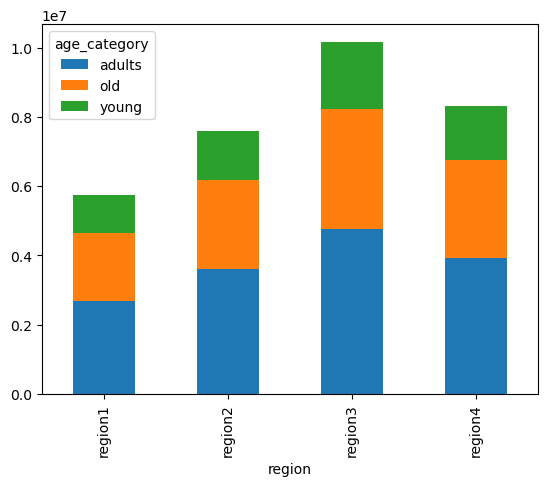

In [54]:
# visualise age and region
age_region=age_region.plot.bar(stacked=True )

In [59]:
# export bar chart
age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age-group.png'))

In [55]:
#group income and region
income_region = ords_prods_merge.groupby(['region','income_category']).size().unstack(fill_value=0)

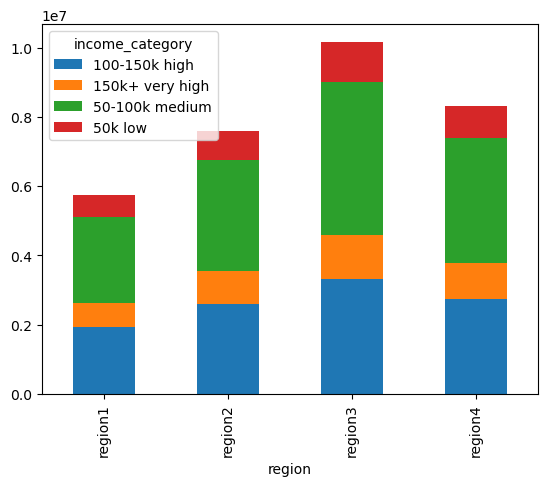

In [56]:
# visualise income and region
income_region=income_region.plot.bar(stacked=True )

In [60]:
# export bar chart
income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income.png'))

In [57]:
# group children status and region
children_region = ords_prods_merge.groupby(['region','with children']).size().unstack(fill_value=0)

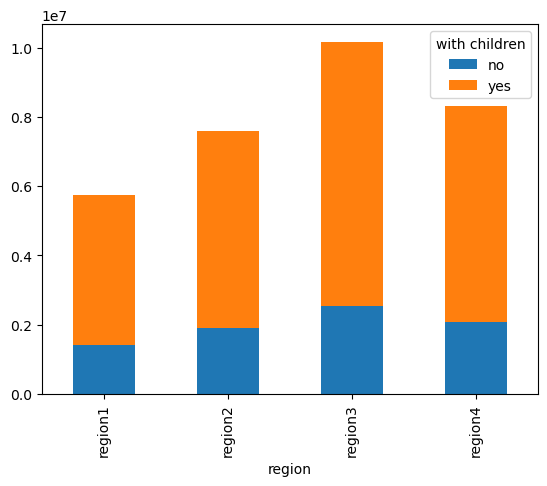

In [58]:
children_region = children_region.plot.bar(stacked=True)

In [61]:
# export bar chart
children_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_children.png'))

In [62]:
# export data as pickle
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Eercise_4.10_part1.pkl'))